In [3]:
import pandas
import random
distance = lambda a,b:((a[0]-b[0])**2 + (a[1]-b[1])**2)**(0.5)
def generate_random_point(x_lim,y_lim,num_of_gen):
    points = []
    for i in range(num_of_gen):
        x = random.uniform(*x_lim)
        y = random.uniform(*y_lim)
        points.append((x,y))
    return points
def estimate_Pi(x_lim,y_lim,num_of_gen):
    inside_circle_num = 0
    radius = (x_lim[1] - x_lim[0])/2
    points = generate_random_point(x_lim,y_lim,num_of_gen)
    for i in range(len(points)):
        if(distance(points[i],(0,0)) <= radius):
            inside_circle_num += 1
    return (inside_circle_num/len(points))*4



estimate Pi

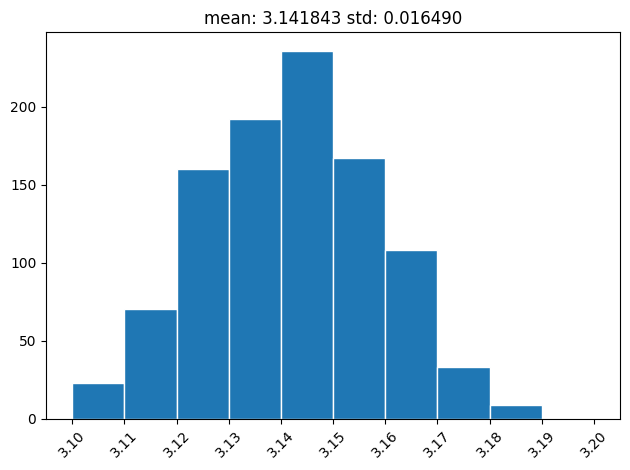

In [4]:

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

pi_estimates = []
for i in range(1000):
    pi_estimates .append(estimate_Pi((-1,1),(-1,1),10000)) 
plt.hist(pi_estimates,bins = np.arange(round(min(pi_estimates),2),round(max(pi_estimates) + 0.01,2),step = 0.01),ec = "white")
plt.xticks(np.arange(round(min(pi_estimates),2),round(max(pi_estimates) + 0.01,2),step = 0.01))
plt.xticks(rotation = 45)
title = "mean: {:.6f} std: {:.6f}".format(np.mean(pi_estimates), np.std(pi_estimates))
plt.title(title)
 
plt.tight_layout()

plt.show()

fit a normal disstribution over the histogram

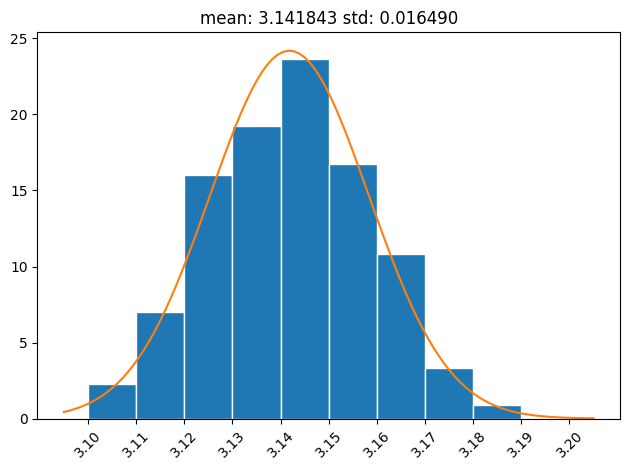

In [6]:
mu, std = norm.fit(pi_estimates)
plt.hist(pi_estimates,bins = np.arange(round(min(pi_estimates),2),round(max(pi_estimates) + 0.01,2),step = 0.01),ec = "white",density=True)
plt.xticks(np.arange(round(min(pi_estimates),2),round(max(pi_estimates) + 0.01,2),step = 0.01))
plt.xticks(rotation = 45)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p)
title = "mean: {:.6f} std: {:.6f}".format(np.mean(pi_estimates), np.std(pi_estimates))
plt.title(title)
 
plt.tight_layout()

plt.show()





mench funtion


In [8]:
import random
def mench():
    player1_board = [i for i in range(0,40)]+['A','A','A','A']
    player2_board = [i for i in range(10,40)]+[i for i in range(10)] + ['A','A','A','A']
    player3_board = [i for i in range(20,40)]+ [i for i in range(20)] + ['A','A','A','A']
    player4_board = [i for i in range(30,40)]+  [i for i in range(30)] +['A','A','A','A']
    board_len = len(player1_board)
    players_board = [player1_board,player2_board,player3_board,player4_board]
    player_location = [-1,-1,-1,-1]
    while(True):
        for i in range(4):
            while(True):
                value = random.randint(1,6)
                if(player_location[i]==-1 and value!=6):
                    break
                elif(player_location[i]==-1 and value == 6):
                    player_location[i] = 0
                    for j in range(4):
                        if i != j and players_board[j][player_location[j]] == players_board[i][player_location[i]]:
                            player_location[j] = -1
                    continue
                elif(player_location[i]!=-1):
                    if (player_location[i] + value >= board_len):
                        if(value != 6):
                            break
                        else:
                            continue
                    else:
                        if (players_board[i][player_location[i] + value] == 'A'):
                            return str(i+1)
                        else : 
                            player_location[i]=player_location[i] + value
                            for j in range(4):
                                if i != j and players_board[j][player_location[j]] == players_board[i][player_location[i]]:
                                    player_location[j] = -1
                            
                            if(value != 6):
                                break
                            else:
                                continue                           
    

show probabilty of win

<Axes: xlabel='percent'>

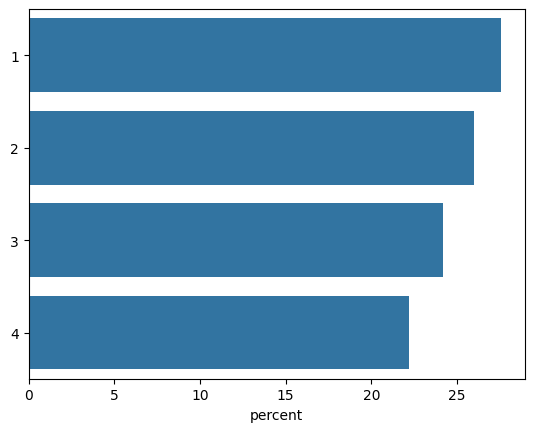

In [9]:
import seaborn as sns
winner = []
for i in range(10000):
    winner.append(mench())
winner.sort()
sns.countplot(winner,stat="percent")


In [10]:
import collections
winner = np.array(winner)

counter = collections.Counter(winner)

print("the win probability first player is: ",counter['1']/len(winner))
print("the win probability second player is",counter['2']/len(winner))
print("the win probability third player is",counter['3']/len(winner))
print("the win probability fourth player is",counter['4']/len(winner))

the win probability first player is:  0.2757
the win probability second player is 0.2601
the win probability third player is 0.242
the win probability fourth player is 0.2222
